In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d

In [2]:
file = '../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-11-07T10_18_45.875.fits'

In [3]:
spec = spec2d.Spec2d(file, xtrim=[2500, 22000], ytrim=[45, 85])


Loading file ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-11-07T10_18_45.875.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-11-07T10_18_45.875.fits (HDU=0)
The input dataset was trimmed
 xrange: 2500:22001.  yrange: 45:86
Final data dimensions (x y): 19501 x 41

Dispersion axis:              x
N_pixels along dispersion axis: 19501



In [4]:
v_data = fits.open(file)[1].data[45:86, 2500:22001]**2

In [5]:
spec.vardata =v_data

Profile max value (before normalization) 51.880341


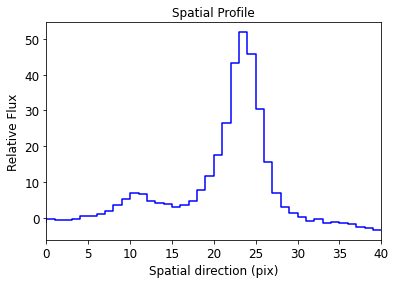

In [6]:
profile = spec.spatial_profile(pixrange=[10000, 11500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 51, 23, 3, 4

amplitude=51.000000, x_0=23.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 7, 12.6, 2, 3

amplitude=7.000000, x_0=12.600000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 10, 10, 3, 4

amplitude=10.000000, x_0=10.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.30323226)>

    [1]: <Moffat1D(amplitude=52.918

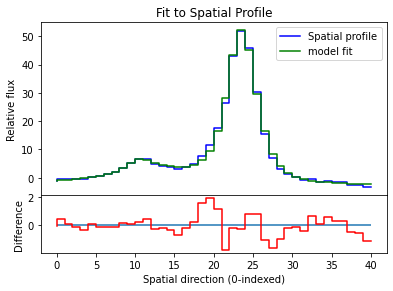

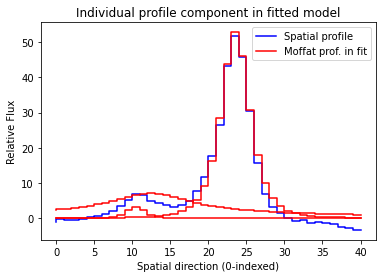


Do you want to start over ? : type yes/no
no


In [7]:
mod = spec.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 51, 23, 3, 4

amplitude=51.000000, x_0=23.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 7, 12.6, 2, 3

amplitude=7.000000, x_0=12.600000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 10, 10, 3, 4

amplitude=10.000000, x_0=10.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.30323226)>

    [1]: <Moffat1D(amplitude=52.918

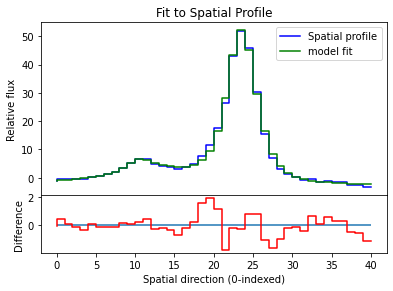

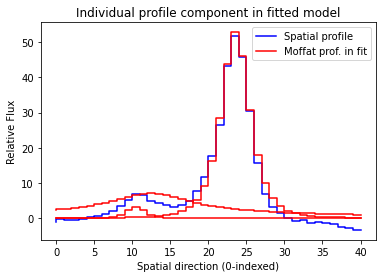


Do you want to start over ? : type yes/no
no


In [9]:
mod = spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.30323226)>

    [1]: <Moffat1D(amplitude=52.91896836, x_0=24.07764188, gamma=3.47487229, alpha=2.02996169)>

    [2]: <Moffat1D(amplitude=7.02919889, x_0=12.82102711, gamma=5.37010811, alpha=0.60330239)>

    [3]: <Moffat1D(amplitude=3.11233409, x_0=11.00352537, gamma=3.30686272, alpha=3.75946812)>
Parameters:
            c0_0           amplitude_1     ...      gamma_3            alpha_3      
    ------------------- ------------------ ... ------------------ ------------------
    -3.3032322649439365 52.918968361265634 ... 3.3068627196173854 3.7594681199311846

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.83734318)>

    [1]: <Moffat1D(a

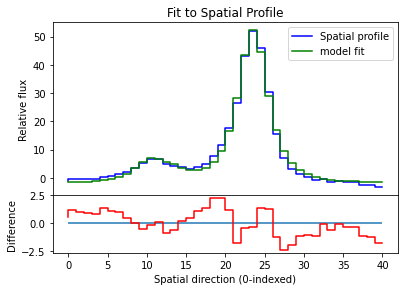

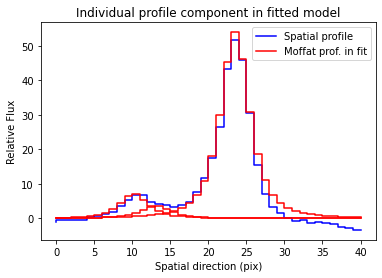

<CompoundModel(c0_0=-1.83734318, amplitude_1=54.00008842, x_0_1=24.03442069, gamma_1=2.99464723, alpha_1=1.55935709, amplitude_2=3.52051039, x_0_2=13.68631943, gamma_2=2.99464723, alpha_2=1.55935709, amplitude_3=6.97387441, x_0_3=10.74328145, gamma_3=2.99464723, alpha_3=1.55935709)>

In [8]:
def tie_pos1_moffat(model):
    return model.x_0_1 - (1.635 / 0.158) # xshooter pixscale in visible wavelength 0.158 #1.635

def tie_pos2_moffat(model):
    return model.x_0_1 - (2.1 / 0.158) #2.1

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

spec.mod0[2].x_0.tied = tie_pos1_moffat
spec.mod0[3].x_0.tied = tie_pos2_moffat
spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 780 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


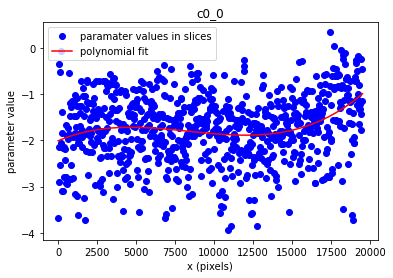

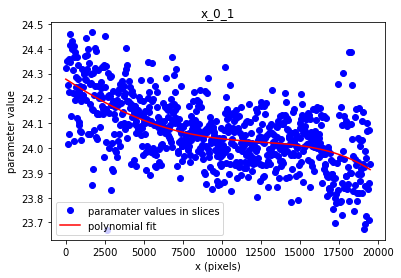

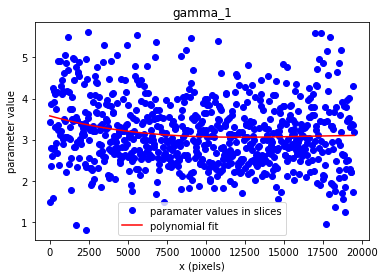

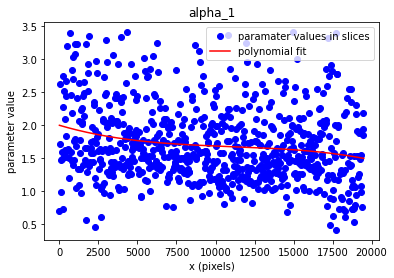

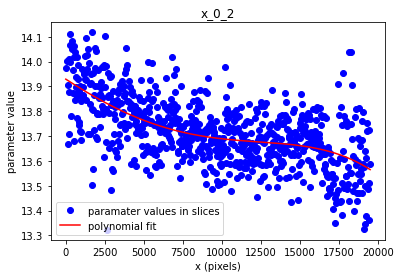

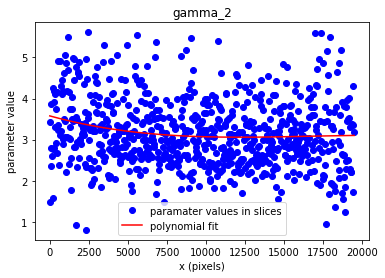

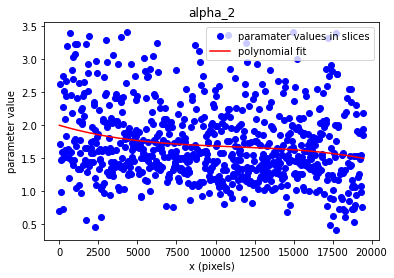

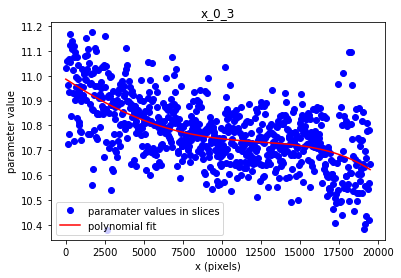

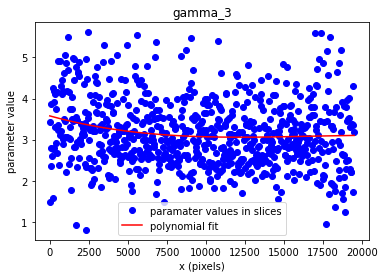

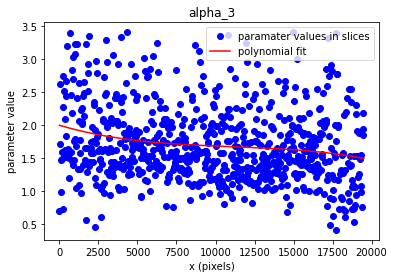

In [9]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4},
                    polyorder=3) #fitrange=fitrange_list[i]
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 19501
Fitting to the trace at 19501 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02


Plotting the spectrum


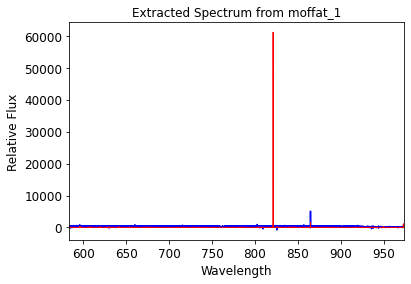

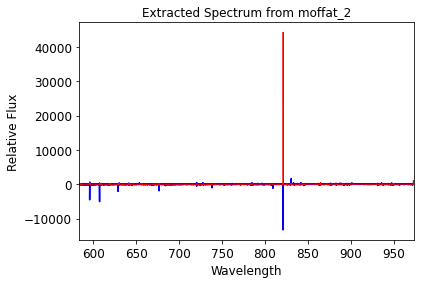

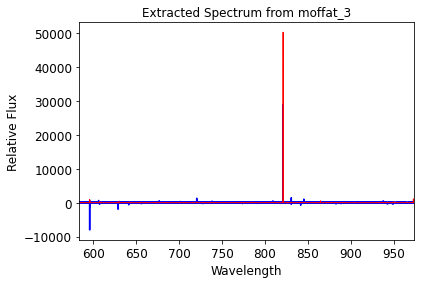

In [10]:
spec.extract(method='modelfit') #, extrange=ext)
plt.show()

In [11]:
sp_im = spec1d.Spec1d(wav=spec.spectra[0][1]['wav']*10, flux = spec.spectra[0][1]['flux'],
                      var=spec.spectra[0][1]['var'])

 Spectrum Start:  5836.60
 Spectrum End:     9736.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


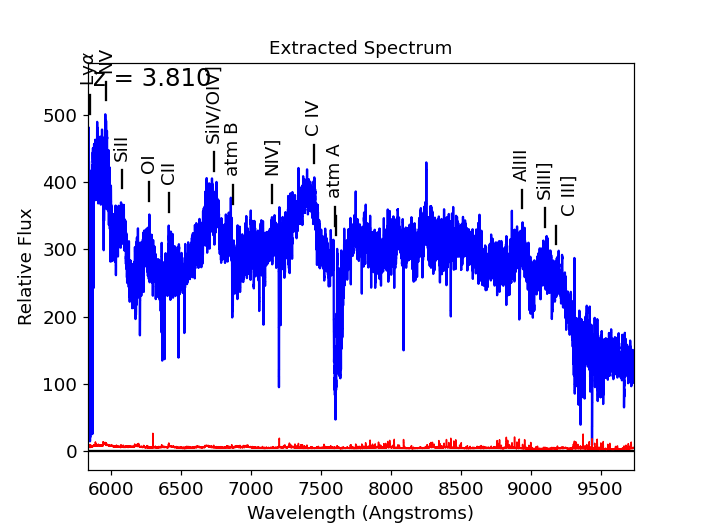


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ly-alpha      1216.00       5848.96
N V           1240.10       5964.88
Si II         1263.30       6076.47
O I           1303.50       6269.84
C II          1334.53       6419.09
Si IV/O IV    1400.00       6734.00
N IV]         1486.50       7150.07
C IV          1549.10       7451.17
Al III        1858.70       8940.35
Si III]       1892.00       9100.52
C III]        1908.70       9180.85



In [12]:
%matplotlib notebook
sp_im.smooth(7)
sp_im.mark_lines('strongem', z=3.81, usesmooth=True)

In [13]:
sp_d = spec1d.Spec1d(wav=spec.spectra[1][1]['wav'][1000:-4000]*10, 
                       flux = spec.spectra[1][1]['flux'][1000:-4000], 
                      var = spec.spectra[1][1]['var'][1000:-4000])

 Spectrum Start:  6036.60
 Spectrum End:     8936.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


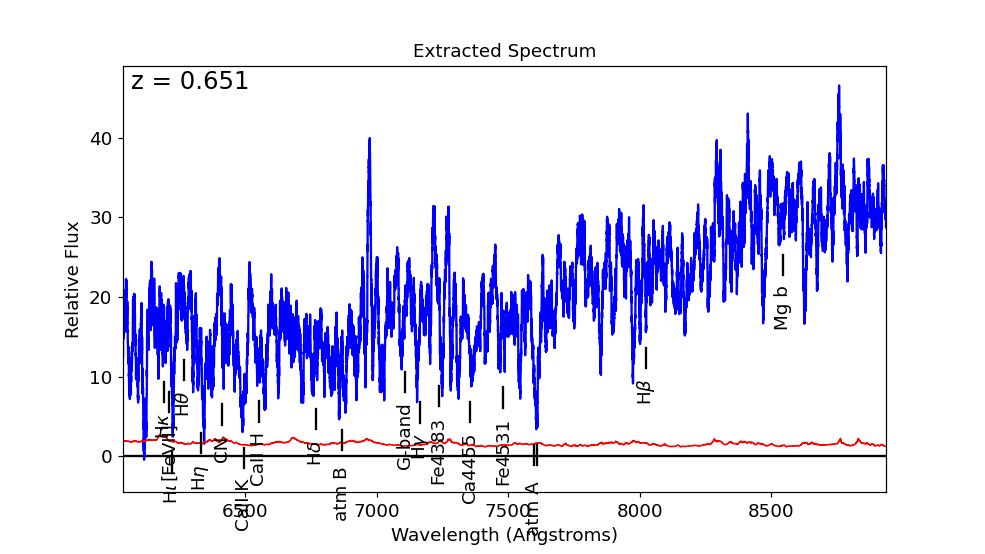


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6191.25
[Fe VII]      3761.40       6210.07
H-iota        3770.00       6224.27
H-theta       3797.00       6268.85
H-eta         3835.00       6331.59
CN bandhd     3883.00       6410.83
CaII K        3933.67       6494.49
CaII H        3968.47       6551.94
H-delta       4101.00       6770.75
G-band        4305.00       7107.56
H-gamma       4340.00       7165.34
Fe4383        4383.00       7236.33
Ca4455        4455.00       7355.20
Fe4531        4531.00       7480.68
H-beta        4861.00       8025.51
Mg I (b)      5176.00       8545.58



In [17]:
sp_d.smooth(61)
#sp_im1.mark_lines('strongem', z=3.81, usesmooth=True)
sp_d.mark_lines('abs', z=0.651, usesmooth=True)

In [18]:
sp_im2 = spec1d.Spec1d(wav=spec.spectra[2][1]['wav'][2200:-5500]*10, 
                     flux = spec.spectra[2][1]['flux'][2200:-5500],
                     var = spec.spectra[2][1]['var'][2200:-5500])

 Spectrum Start:  6276.60
 Spectrum End:     8636.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


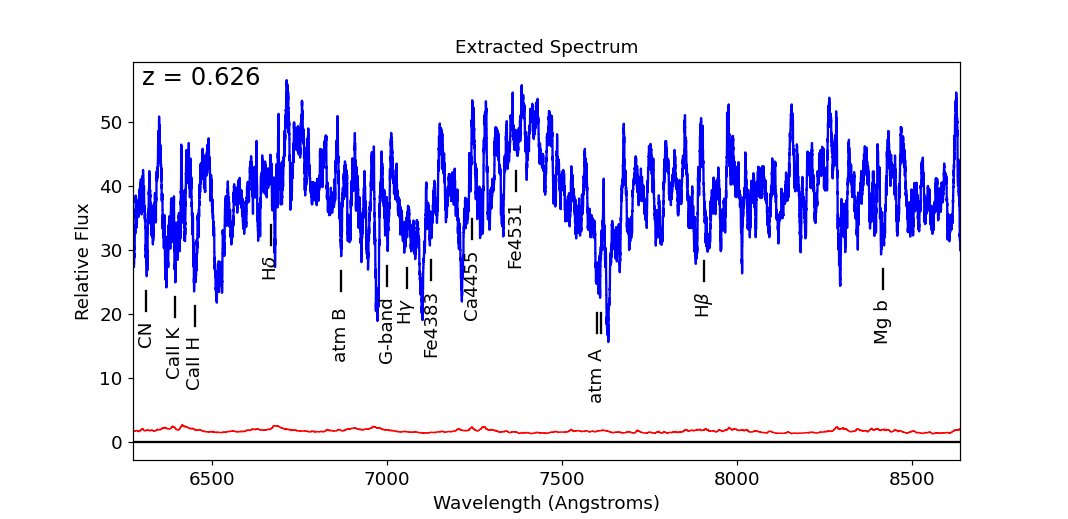


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       6313.76
CaII K        3933.67       6396.15
CaII H        3968.47       6452.73
H-delta       4101.00       6668.23
G-band        4305.00       6999.93
H-gamma       4340.00       7056.84
Fe4383        4383.00       7126.76
Ca4455        4455.00       7243.83
Fe4531        4531.00       7367.41
H-beta        4861.00       7903.99
Mg I (b)      5176.00       8416.18



In [19]:
sp_im2.smooth(51)
sp_im2.mark_lines('abs', z=0.626, usesmooth=True, markatm=True)
#sp_im2.mark_lines('strongem', z=3.81, usesmooth=True, markatm=True)

In [20]:
spec.spectra[0][1].save('J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_primary.fits', outformat='fits')

Saved spectrum to file J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_primary.fits in format fits


In [21]:
spec.spectra[1][1].save('J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_deflector.fits', outformat='fits')
spec.spectra[2][1].save('J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_secondary.fits', outformat='fits')

Saved spectrum to file J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_deflector.fits in format fits
Saved spectrum to file J0053_ESI_spectra/spec1d_J0053_xshooter_vis_875_secondary.fits in format fits
